# Natural Language Processing - Word Embedding
# FEEC/Unicamp - November/2020
### Based on https://kavita-ganesan.com/gensim-word2vec-tutorial-starter-code/#.Xwa18pWSncc
### Based on https://github.com/kavgan/nlp-in-practice/blob/master/word2vec/Word2Vec.ipynb
### Based on https://www.kaggle.com/pierremegret/gensim-word2vec-tutorial

# Perguntas teóricas

## word2vec

word2vec foi inventado como forma de reduzir a "maldição de dimensionalidade". Antes disso, as técnicas mais comuns eram n-grams, baseadas em uma representação one-hot das palavras, que, portanto, ocupavam muita memória e custo computacional. A solução apresentada pela técnica word2vec é representar palavras num espaço vetorial real n-dimensional (R^n). Desta forma, além de resolver o problema anterior, pois é possível utilizar apenas um vetor de números ponto-flutuante para representar uma palavra - com dimensões muito menores do que uma palavra representada em one-hot com um dicionário razoável -, a técnica obteve outras vantagens como explorado neste notebook: a questão de que palavras com similaridade semântica, possuem representação vetorial similar (com uma distância pequena) uma da outra.

## t-SNE

t-distributed stochastic neighbor embedding (ou t-SNE) é uma técnica de visualização de dados, frequentemente utilizada em aprendizado de máquina. Especificamente é uma técnica de redução de dimensionalidade não linear, muito potente para mapear espaços de muitas dimensões em espaços em 2 ou 3 dimensões (passíveis de serem visualizados em uma tela de computador). Desta forma, pontos que estão próximos no espaço vetorial original, também estariam próximos num espaço reduzido, podendo-se visualizar as distâncias entre dados.

# Exercício computacional

## Configurações

In [ ]:
# Imports needed and logging
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
from sklearn.manifold import TSNE
import seaborn as sns
import gzip
import gensim 
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [ ]:
data_file="/content/reviews_data.txt.gz" # Please, define the working directory appropriately
!gunzip {data_file}
data_file="/content/reviews_data.txt"

gzip: /content/reviews_data.txt.gz: No such file or directory


In [ ]:
def read_input(input_file):
    """This method reads the input file which is in gzip format"""
    
    logging.info("reading file {0}...this may take a while".format(input_file))
    
    with open (input_file, 'rb') as f:
        for i, line in enumerate (f): 
            if (i%10000==0):
                logging.info ("read {0} reviews".format (i))
            # do some pre-processing and return a list of words for each review text
            yield gensim.utils.simple_preprocess (line)

# read the tokenized reviews into a list
# each review item becomes a serries of words
# so this becomes a list of lists
documents = list(read_input (data_file))
logging.info("Done reading data file")

2020-11-27 02:21:46,087 : INFO : reading file /content/reviews_data.txt...this may take a while
2020-11-27 02:21:46,088 : INFO : read 0 reviews
2020-11-27 02:21:47,965 : INFO : read 10000 reviews
2020-11-27 02:21:49,843 : INFO : read 20000 reviews
2020-11-27 02:21:51,998 : INFO : read 30000 reviews
2020-11-27 02:21:54,035 : INFO : read 40000 reviews
2020-11-27 02:21:56,233 : INFO : read 50000 reviews
2020-11-27 02:21:58,632 : INFO : read 60000 reviews
2020-11-27 02:22:00,510 : INFO : read 70000 reviews
2020-11-27 02:22:02,191 : INFO : read 80000 reviews
2020-11-27 02:22:03,957 : INFO : read 90000 reviews
2020-11-27 02:22:05,661 : INFO : read 100000 reviews
2020-11-27 02:22:07,343 : INFO : read 110000 reviews
2020-11-27 02:22:09,095 : INFO : read 120000 reviews
2020-11-27 02:22:10,847 : INFO : read 130000 reviews
2020-11-27 02:22:12,722 : INFO : read 140000 reviews
2020-11-27 02:22:14,969 : INFO : read 150000 reviews
2020-11-27 02:22:16,713 : INFO : read 160000 reviews
2020-11-27 02:22:

## Treinamento do modelo word2vec

In [ ]:
model = gensim.models.Word2Vec (documents, size=150, window=10, min_count=2, workers=10)
model.train(documents,total_examples=len(documents),epochs=10)

2020-11-27 02:22:44,536 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2020-11-27 02:22:44,540 : INFO : collecting all words and their counts
2020-11-27 02:22:44,543 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-11-27 02:22:44,869 : INFO : PROGRESS: at sentence #10000, processed 1655714 words, keeping 25777 word types
2020-11-27 02:22:45,203 : INFO : PROGRESS: at sentence #20000, processed 3317863 words, keeping 35016 word types
2020-11-27 02:22:45,602 : INFO : PROGRESS: at sentence #30000, processed 5264072 words, keeping 47518 word types
2020-11-27 02:22:45,992 : INFO : PROGRESS: at sentence #40000, processed 7081746 words, keeping 56675 word types
2020-11-27 02:22:46,395 : INFO : PROGRESS: at sentence #50000, processed 9089491 words, keeping 63744 word types
2020-11-27 02:22:46,785 : INFO : PROGRESS: at sentence #60000, processed 11013723 words, keeping 76781 word types
2020-11-27 02:22:47,120 : INFO : PROGRESS: a

(303500172, 415193550)

## Resultados com palavras similares no espaço vetorial criado

In [ ]:
w1 = "dirty"
model.wv.most_similar (positive=w1)

2020-11-27 02:44:54,622 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('filthy', 0.8561040759086609),
 ('unclean', 0.778730034828186),
 ('stained', 0.7716752290725708),
 ('dusty', 0.7677520513534546),
 ('smelly', 0.7657263875007629),
 ('grubby', 0.7425854802131653),
 ('disgusting', 0.7226787209510803),
 ('gross', 0.7222616672515869),
 ('dingy', 0.7158570289611816),
 ('soiled', 0.7090240716934204)]

In [ ]:
# look up top 6 words similar to 'polite'
w1 = ["polite"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('courteous', 0.9177355170249939),
 ('friendly', 0.8253560662269592),
 ('cordial', 0.8140016794204712),
 ('professional', 0.7988128066062927),
 ('curteous', 0.7941778302192688),
 ('attentive', 0.7735409140586853)]

In [ ]:
# look up top 6 words similar to 'france'
w1 = ["france"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('canada', 0.6557357907295227),
 ('germany', 0.6445648074150085),
 ('barcelona', 0.6118474006652832),
 ('austria', 0.6086550951004028),
 ('spain', 0.6040906310081482),
 ('england', 0.5980968475341797)]

In [ ]:
# look up top 6 words similar to 'shocked'
w1 = ["shocked"]
model.wv.most_similar (positive=w1,topn=6)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('horrified', 0.810010552406311),
 ('amazed', 0.8083926439285278),
 ('stunned', 0.7910133004188538),
 ('astonished', 0.773958683013916),
 ('dismayed', 0.7613043785095215),
 ('appalled', 0.7494632601737976)]

In [ ]:
# get everything related to stuff on the bed
w1 = ["bed",'sheet','pillow']
w2 = ['couch']
model.wv.most_similar (positive=w1,negative=w2,topn=10)

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('blanket', 0.710557758808136),
 ('mattress', 0.7020052075386047),
 ('duvet', 0.6976770162582397),
 ('quilt', 0.6967544555664062),
 ('matress', 0.67365962266922),
 ('pillowcase', 0.6369699239730835),
 ('sheets', 0.6360685229301453),
 ('pillows', 0.6349208950996399),
 ('pillowcases', 0.6157918572425842),
 ('foam', 0.6130350828170776)]

Aqui o modelo calcula a "semelhança" entre duas palavras, considerando a distância entre as palavras no espaço vetorial (similaridade = 1, máxima; similaridade = 0, mínima)

In [ ]:
# similarity between two different words
model.wv.similarity(w1="dirty",w2="smelly")

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


0.7657264

Aqui o modelo é capaz de excluir a palavra que não estaria na mesma categoria que as demais, ao se analisar suas posições no espaço vetorial criado.

In [ ]:
# Which one is the odd one out in this list?
model.wv.doesnt_match(['bed','pillow','duvet','shower'])

/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'shower'

## Análise visual: t-SNE (2D)

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 150), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=18).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

## Resultados

Análise gráfica da similaridade de algumas palavras com a palavra "bed".

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


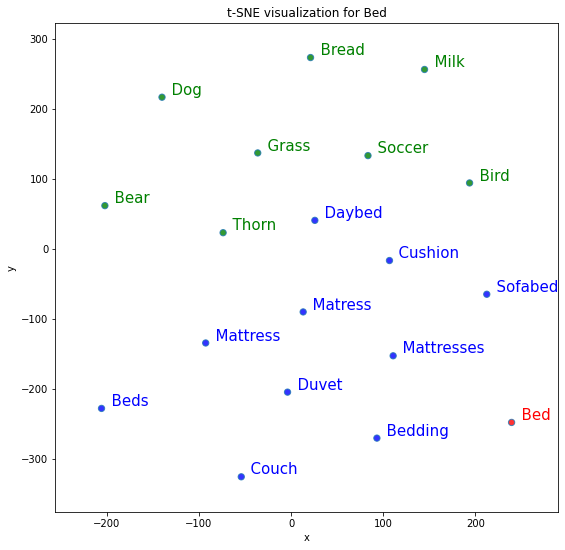

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt

tsnescatterplot(model, 'bed', ['dog', 'bird', 'grass', 'milk', 'soccer', 'bread', 'thorn', 'bear'])

Análise gráfica da similaridade das 20 palavras mais similares à palavra "matress".

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


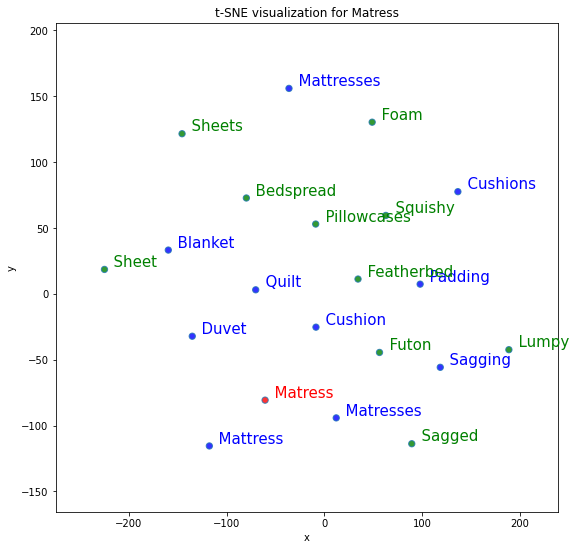

In [ ]:
tsnescatterplot(model, "matress", [t[0] for t in model.wv.most_similar(positive=["matress"], topn=20)][10:])